In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
status = pd.read_csv('./data/status.csv', low_memory=True)
status[:10]

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01
5,2,2,25,2013/08/29 12:11:01
6,2,2,25,2013/08/29 12:12:01
7,2,2,25,2013/08/29 12:13:01
8,2,2,25,2013/08/29 12:15:01
9,2,2,25,2013/08/29 12:16:02


In [3]:
tabla = pd.read_csv('./tablIdZip.csv', low_memory=True)
tabla['station_id'] = tabla['id']
tabla[:10]

,Unnamed: 0,id,zipCode,station_id
0,0,2,95113,2
1,1,3,95113,3
2,2,4,95113,4
3,3,5,95113,5
4,4,6,95113,6
5,5,7,95113,7
6,6,8,95113,8
7,7,9,95113,9
8,8,10,95113,10
9,9,11,95113,11


In [4]:
#vemos la cantidad de reportes por cantidad de vicis
NotBike = status['bikes_available'].value_counts()
NotBike[:10]

7     8531888
8     8421453
6     7470359
9     7214794
5     5924336
10    5711698
11    4435841
4     4291350
12    3416705
3     2921330
Name: bikes_available, dtype: int64

In [5]:
#Lo mas importante es saber cuando No Hay bicis. En esos casos no estamos cumpliendo con el servicio ni con los clientes.
NotBike = status.loc[:,['station_id','bikes_available','time']].groupby('bikes_available')
NotBike = NotBike.get_group(0)
NotBike[:10]

,station_id,bikes_available,time
91002,2,0,2013/11/03 02:00:01
91003,2,0,2013/11/03 02:01:01
91004,2,0,2013/11/03 02:02:01
91005,2,0,2013/11/03 02:03:01
136103,2,0,2013/12/04 10:02:03
136104,2,0,2013/12/04 10:03:02
136105,2,0,2013/12/04 10:04:02
136106,2,0,2013/12/04 10:05:02
136107,2,0,2013/12/04 10:06:03
136108,2,0,2013/12/04 10:07:03


In [6]:
#Estaciones con mas reportes de falta de bisicleta.
NotBike1 = NotBike['station_id'].value_counts()
NotBike1[:10]

45    29198
76    24725
48    24401
62    24077
60    23143
70    21726
73    20739
41    19080
82    17824
64    17111
Name: station_id, dtype: int64

In [7]:
#Lo emparejamos con el Codigo Zip. para poder comprarlo con el Clima
NotBikeZip = pd.merge(NotBike, tabla, on='station_id', how='right')
NotBike = NotBikeZip.loc[:,("time","id","zipCode")]
NotBikeZip[:10]

,station_id,bikes_available,time,Unnamed: 0,id,zipCode
0,2,0,2013/11/03 02:00:01,0,2,95113
1,2,0,2013/11/03 02:01:01,0,2,95113
2,2,0,2013/11/03 02:02:01,0,2,95113
3,2,0,2013/11/03 02:03:01,0,2,95113
4,2,0,2013/12/04 10:02:03,0,2,95113
5,2,0,2013/12/04 10:03:02,0,2,95113
6,2,0,2013/12/04 10:04:02,0,2,95113
7,2,0,2013/12/04 10:05:02,0,2,95113
8,2,0,2013/12/04 10:06:03,0,2,95113
9,2,0,2013/12/04 10:07:03,0,2,95113


In [9]:
import calendar
NotBike['time'] = pd.to_datetime(NotBike['time'])
NotBike['year'] = NotBike['time'].map(lambda x:x.year)
NotBike['hour'] = pd.to_datetime(NotBike['time'], format = '%H', errors = 'coerce').dt.hour

NotBike[:10]

,time,id,zipCode,year,hour
0,2013-11-03 02:00:01,2,95113,2013,2
1,2013-11-03 02:01:01,2,95113,2013,2
2,2013-11-03 02:02:01,2,95113,2013,2
3,2013-11-03 02:03:01,2,95113,2013,2
4,2013-12-04 10:02:03,2,95113,2013,10
5,2013-12-04 10:03:02,2,95113,2013,10
6,2013-12-04 10:04:02,2,95113,2013,10
7,2013-12-04 10:05:02,2,95113,2013,10
8,2013-12-04 10:06:03,2,95113,2013,10
9,2013-12-04 10:07:03,2,95113,2013,10


In [10]:
#guradmos
NotBike.to_csv("NotBike.csv")

In [11]:
#Revisamos lo mismo con los Docks
NotDocks = status['docks_available'].value_counts()
NotDocks[:10]

8     8060999
7     7654326
9     7196088
6     6366026
10    6193698
11    5326801
5     4670877
12    4320116
13    3571719
4     3117316
Name: docks_available, dtype: int64

In [12]:
# Otra ves el caso intersante es que halla 0 Docks. Es implica que uno llega con la bici y no la puede guadar
# Un fallo en el servicio
NotDocks = status.loc[:,['station_id','docks_available','time']].groupby('docks_available')
NotDocks = NotDocks.get_group(0)
NotDocks[:10]

,station_id,docks_available,time
272259,3,0,2013/09/07 15:06:01
272260,3,0,2013/09/07 15:08:01
272261,3,0,2013/09/07 15:10:01
272262,3,0,2013/09/07 15:11:01
272263,3,0,2013/09/07 15:12:01
272264,3,0,2013/09/07 15:13:02
272265,3,0,2013/09/07 15:14:01
272266,3,0,2013/09/07 15:15:01
272267,3,0,2013/09/07 15:16:02
272268,3,0,2013/09/07 15:17:01


In [13]:
#Los lugares con mallor falta de Dock. No podemos estimar cuantos faltan agregar
NotDocks1 = NotDocks['station_id'].value_counts()
NotDocks1[:10]

54    30136
73    20760
60    19543
70    19422
72    17011
69    13639
65    13193
39    12376
35    11019
48    10916
Name: station_id, dtype: int64

In [14]:
NotDocksZip = pd.merge(NotDocks, tabla, on='station_id', how='right')
NotDocksZip[:10]

,station_id,docks_available,time,Unnamed: 0,id,zipCode
0,3.0,0.0,2013/09/07 15:06:01,1,3,95113
1,3.0,0.0,2013/09/07 15:08:01,1,3,95113
2,3.0,0.0,2013/09/07 15:10:01,1,3,95113
3,3.0,0.0,2013/09/07 15:11:01,1,3,95113
4,3.0,0.0,2013/09/07 15:12:01,1,3,95113
5,3.0,0.0,2013/09/07 15:13:02,1,3,95113
6,3.0,0.0,2013/09/07 15:14:01,1,3,95113
7,3.0,0.0,2013/09/07 15:15:01,1,3,95113
8,3.0,0.0,2013/09/07 15:16:02,1,3,95113
9,3.0,0.0,2013/09/07 15:17:01,1,3,95113


In [15]:
NotDocks = NotBikeZip.loc[:,("time","id","zipCode")]
NotDocks[:10]

,time,id,zipCode
0,2013/11/03 02:00:01,2,95113
1,2013/11/03 02:01:01,2,95113
2,2013/11/03 02:02:01,2,95113
3,2013/11/03 02:03:01,2,95113
4,2013/12/04 10:02:03,2,95113
5,2013/12/04 10:03:02,2,95113
6,2013/12/04 10:04:02,2,95113
7,2013/12/04 10:05:02,2,95113
8,2013/12/04 10:06:03,2,95113
9,2013/12/04 10:07:03,2,95113


In [16]:
NotDocks['time'] = pd.to_datetime(NotDocks['time'])
NotDocks['year'] = NotDocks['time'].map(lambda x:x.year)
NotDocks['hour'] = pd.to_datetime(NotDocks['time'], format = '%H', errors = 'coerce').dt.hour

NotDocks[:10]

,time,id,zipCode,year,hour
0,2013-11-03 02:00:01,2,95113,2013,2
1,2013-11-03 02:01:01,2,95113,2013,2
2,2013-11-03 02:02:01,2,95113,2013,2
3,2013-11-03 02:03:01,2,95113,2013,2
4,2013-12-04 10:02:03,2,95113,2013,10
5,2013-12-04 10:03:02,2,95113,2013,10
6,2013-12-04 10:04:02,2,95113,2013,10
7,2013-12-04 10:05:02,2,95113,2013,10
8,2013-12-04 10:06:03,2,95113,2013,10
9,2013-12-04 10:07:03,2,95113,2013,10


In [17]:
NotDocks.to_csv("NotDocks.csv")

In [18]:
#buscamos si hay una relacion entre la cantidad de Docks libre y bisicletas
grouped  = status.loc[:,['station_id','bikes_available','docks_available']].groupby('station_id')
Station = grouped.mean()
Station[:10]

,bikes_available,docks_available
station_id,,
2,13.172570,13.761535
3,8.461138,6.527884
4,5.293746,5.685249
5,8.114816,10.868663
6,7.608563,7.383773
7,8.533147,6.445585
8,7.541344,7.425911
9,8.264154,6.717211
10,6.357413,8.633980


In [19]:
#Resulta que si.
#Cosa que nos lleva a pensar que no hay una relacion con la hubicacion del lugar con que halla o no bisicletas
#Por lo que se puede estimar que es algo mas relativo a la hora. 
Station.loc[:,['bikes_available','docks_available']].corr()

,bikes_available,docks_available
bikes_available,1.000000,0.581697
docks_available,0.581697,1.000000


In [2]:
NotBike = pd.read_csv('./NotBike.csv', low_memory=True, parse_dates=['time'])
NotBike.time = NotBike.time.dt.date
NotBike[:10]

,Unnamed: 0,time,id,zipCode,year,hour
0,0,2013-11-03,2,95113,2013,2
1,1,2013-11-03,2,95113,2013,2
2,2,2013-11-03,2,95113,2013,2
3,3,2013-11-03,2,95113,2013,2
4,4,2013-12-04,2,95113,2013,10
5,5,2013-12-04,2,95113,2013,10
6,6,2013-12-04,2,95113,2013,10
7,7,2013-12-04,2,95113,2013,10
8,8,2013-12-04,2,95113,2013,10
9,9,2013-12-04,2,95113,2013,10


In [3]:
NotBike.to_csv("NotBikeFinal.csv")
#con esto borre la hora Que no me sirve y me quede con el dia.

In [15]:
NotDocks = pd.read_csv('./NotDocks.csv', low_memory=True, parse_dates=['time'])
NotDocks.time = NotDocks.time.dt.date
NotDocks[:10]

,Unnamed: 0,time,id,zipCode,year,hour
0,0,2013-11-03,2,95113,2013,2
1,1,2013-11-03,2,95113,2013,2
2,2,2013-11-03,2,95113,2013,2
3,3,2013-11-03,2,95113,2013,2
4,4,2013-12-04,2,95113,2013,10
5,5,2013-12-04,2,95113,2013,10
6,6,2013-12-04,2,95113,2013,10
7,7,2013-12-04,2,95113,2013,10
8,8,2013-12-04,2,95113,2013,10
9,9,2013-12-04,2,95113,2013,10


In [24]:
NotDocks.to_csv("NotDocksFinal.csv")

In [5]:
#segunda parte
NotBikeDos = NotBike.loc[:,['id','zipCode','time','hour']].groupby('id')
NotBikeDos = NotBikeDos.get_group(2)
NotBikeDos[:10]



,id,zipCode,time,hour
0,2,95113,2013-11-03,2
1,2,95113,2013-11-03,2
2,2,95113,2013-11-03,2
3,2,95113,2013-11-03,2
4,2,95113,2013-12-04,10
5,2,95113,2013-12-04,10
6,2,95113,2013-12-04,10
7,2,95113,2013-12-04,10
8,2,95113,2013-12-04,10
9,2,95113,2013-12-04,10


<IPython.core.display.Javascript object>


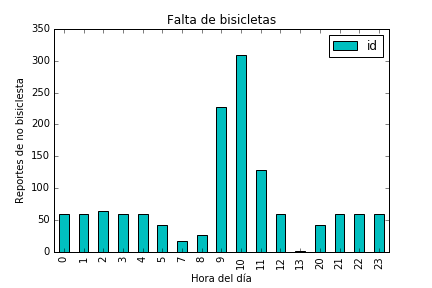

In [11]:
%matplotlib notebook
id2= NotBikeDos.loc[:,('hour', 'id')].groupby('hour').agg(np.size)
id2.plot.bar(color='c')
plt.xlabel("Hora del día")
plt.ylabel("Reportes de no bisiclesta")
plt.title("Falta de bisicletas")

<IPython.core.display.Javascript object>


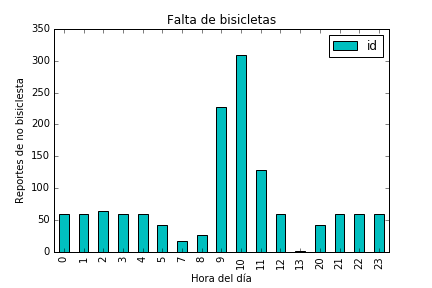

In [20]:
#Notamos similutud entre la falta de Docks por hora y la fatla de bicis por hora. 
#Es logico una similtu por que sabemos que la cantidad de ambas cosas tiene una relacion
#Pero al notar que ambas son similares e la misma hora del dia. 
#Solo podemos suponer que el alto movimiento de bicis mantiene todo en "orden"
#Por lo que estimamos que no podremos calcular 

NotDokeDos = NotDocks.loc[:,['id','zipCode','time','hour']].groupby('id')
NotDoke2 = NotDokeDos.get_group(2)

NotDoke2= NotDoke2.loc[:,('hour', 'id')].groupby('hour').agg(np.size)
NotDoke2.plot.bar(color='c')
plt.xlabel("Hora del día")
plt.ylabel("Reportes de no docks")
plt.title("Falta de docks")

In [ ]:
#Vemos si en otra ciudad pasa algo distinto.
#Se confirma que en todas las ciduades pasa lo mismo. 
#15 17 18 19 20 40 43 44 52 53 78 79 81 80